In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

# Downloading/ Fetching the data

In [2]:
mnist = fetch_openml('mnist_784', version = 1) # it contains 70000 images of 28X28 pixel each

# taking the data into x and y

In [10]:
x = np.array(mnist['data'])
y = np.array(mnist['target'], dtype = np.int8)

# Plotting and seeing the data contents

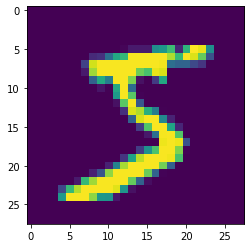

In [17]:
plt.imshow(x[0].reshape(28,28))         # reshape is to put 1 row, 784 columns to 28rows and 28 columns.
plt.show()

# Preparing the data for binary classifier

In [18]:
y_3 = (y == 3)

In [20]:
# Splitting the data into test train
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test, y_train, y_test = train_test_split(x,y_3, test_size= 0.2, random_state=42)

In [22]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [23]:
sgd_clf = SGDClassifier(random_state=42)
log_reg = LogisticRegression()

In [24]:
sgd_clf.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [25]:
y_pred = sgd_clf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
classification_report(y_test, y_pred, output_dict = True)

{'False': {'precision': 0.9915154569892473,
  'recall': 0.939205856608578,
  'f1-score': 0.9646520371051449,
  'support': 12567},
 'True': {'precision': 0.6354961832061069,
  'recall': 0.9295184926727146,
  'f1-score': 0.7548880702748655,
  'support': 1433},
 'accuracy': 0.9382142857142857,
 'macro avg': {'precision': 0.813505820097677,
  'recall': 0.9343621746406463,
  'f1-score': 0.8597700536900053,
  'support': 14000},
 'weighted avg': {'precision': 0.9550743413227301,
  'recall': 0.9382142857142857,
  'f1-score': 0.9431811967860171,
  'support': 14000}}

In [32]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, x_train,y_train, cv = 5, method = 'decision_function')

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precision, recall, threshold = precision_recall_curve(y_train, y_scores)

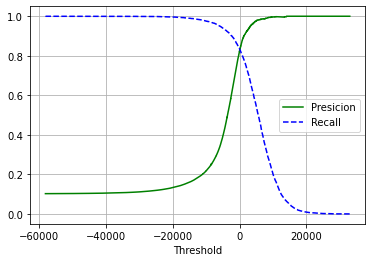

In [41]:
plt.plot(threshold, precision[:-1], 'g-', label = 'Presicion')
plt.plot(threshold, recall[:-1], 'b--', label = 'Recall')
plt.grid()
plt.xlabel('Threshold')
plt.legend()
plt.show()

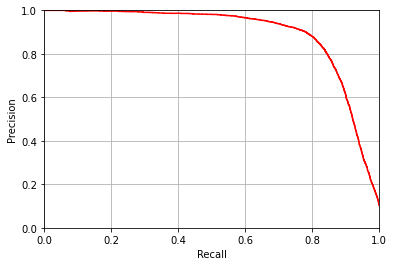

In [43]:
# plotting Precision vs recall
plt.plot(recall, precision, 'r-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.axis([0,1,0,1])
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
accuracy = cross_val_score(sgd_clf, x_train,y_train, cv = 5, scoring = 'accuracy')
accuracy

array([0.96839286, 0.94767857, 0.97125   , 0.96901786, 0.96839286])

In [47]:
accuracy.mean()

0.9649464285714286

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
y_scores_log = cross_val_predict(log_reg, x_train, y_train, cv = 5 , method = 'decision_function')

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

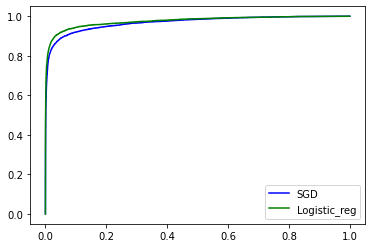

In [56]:
fpr,tpr, threshold = roc_curve(y_train, y_scores)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_scores_log)
plt.plot(fpr, tpr, 'b-', label = 'SGD')
plt.plot(fpr_log, tpr_log, 'g-', label = 'Logistic_reg')
plt.legend()
plt.show()

In [59]:
sgd_roc_score = roc_auc_score(y_train,y_scores)
log_roc_score = roc_auc_score(y_train,y_scores_log)
log_roc_score, sgd_roc_score 

(0.9753078287691261, 0.9679608298468966)